In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# get all file path in the current directory with "large" in the name
def get_large_files():
    files = []
    for file in os.listdir('.'):
        files.append(file)
    return files

In [54]:
paths = get_large_files()

In [56]:
paths_filtered = [path for path in paths if 'large' in path]

In [ ]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [34]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "12-14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "12-14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12-14B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "12-14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}


In [43]:
model_families = {
    # Meta - Llama family
    "Llama-3.1-8B-Instruct": "Llama Family",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "Llama Family",
    "Llama-3.2-3B-Instruct": "Llama Family",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "Llama Family",

    # Microsoft - Phi family
    "Phi-3-mini-128k-instruct": "Phi Family",
    "Phi-3-small-128k-instruct": "Phi Family",
    "Phi-3-medium-128k-instruct": "Phi Family",
    "Phi-3.5-mini-instruct": "Phi Family",
    "Phi-4-mini-instruct": "Phi Family",
    "phi-4": "Phi Family",

    # Mistral family
    "Mistral-Nemo-Instruct-2407": "Mistral Family",
    "Ministral-8B-Instruct-2410": "Mistral Family",

    # Qwen family
    "Qwen2-72B-Instruct-AWQ": "Qwen Family",
    "Qwen2-7B-Instruct": "Qwen Family",
    "Qwen2.5-72B-Instruct-AWQ": "Qwen Family",
    "Qwen2.5-14B-Instruct": "Qwen Family",
    "Qwen2.5-7B-Instruct": "Qwen Family",
    "Qwen2.5-3B-Instruct": "Qwen Family",

    # Falcon family
    "Falcon3-7B-Instruct": "Falcon Family",
    "Falcon3-3B-Instruct": "Falcon Family",
}

In [44]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

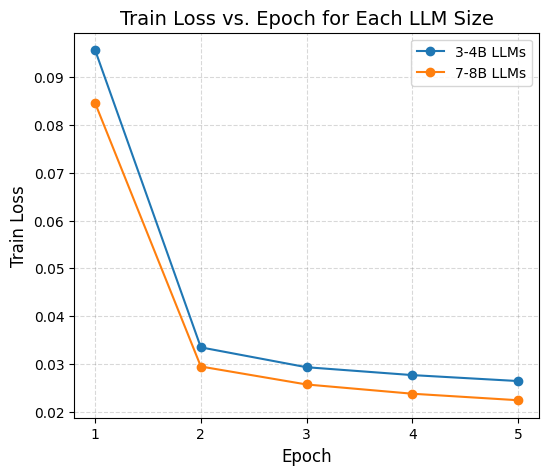

In [48]:
grouped = df_main.groupby(["model_size", "epoch"])["train_loss"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12-14B LLMs", "70B+ LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

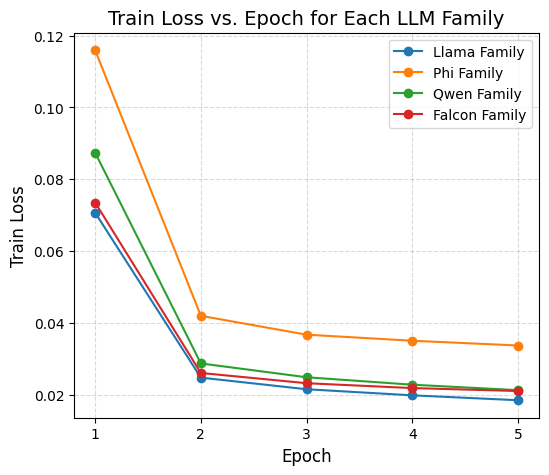

In [49]:
grouped = df_main.groupby(["model_family", "epoch"])["train_loss"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

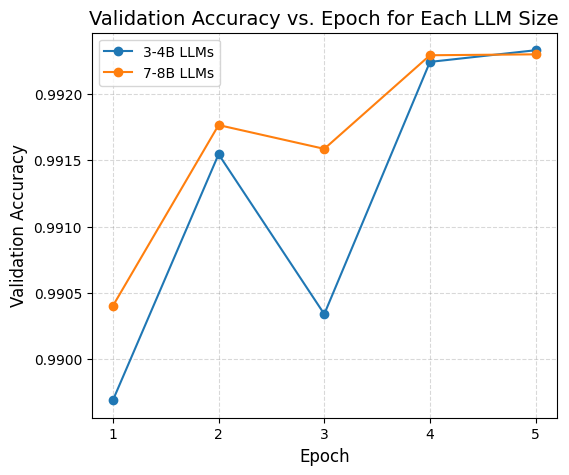

In [50]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12-14B LLMs", "70B+ LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

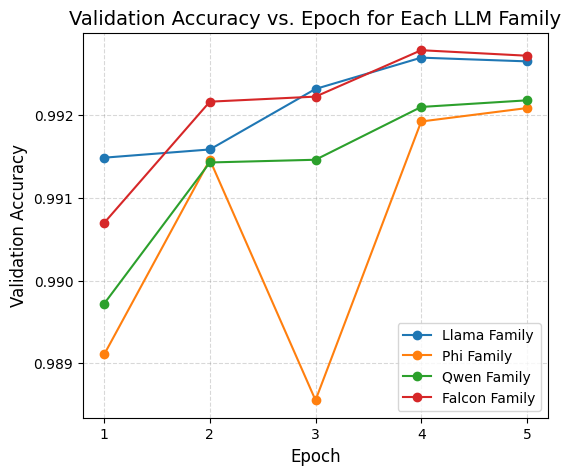

In [51]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [57]:
paths_filtered = [path for path in paths if 'detect-gpt' in path]

In [58]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [59]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

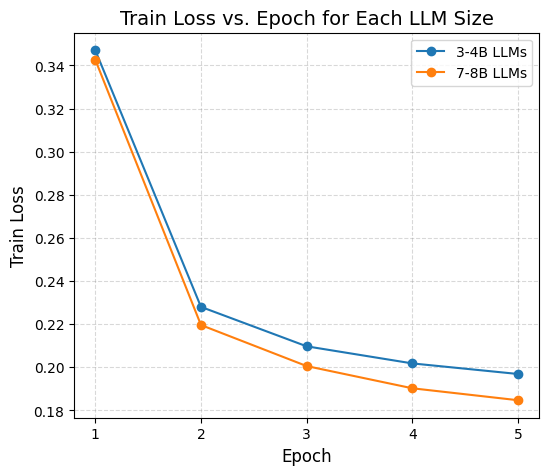

In [60]:
grouped = df_main.groupby(["model_size", "epoch"])["train_loss"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12-14B LLMs", "70B+ LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

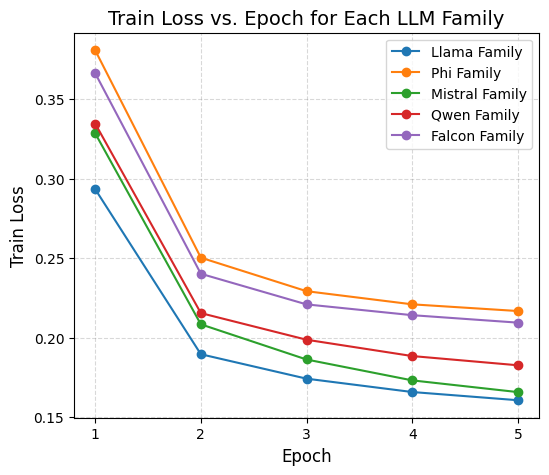

In [61]:
grouped = df_main.groupby(["model_family", "epoch"])["train_loss"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

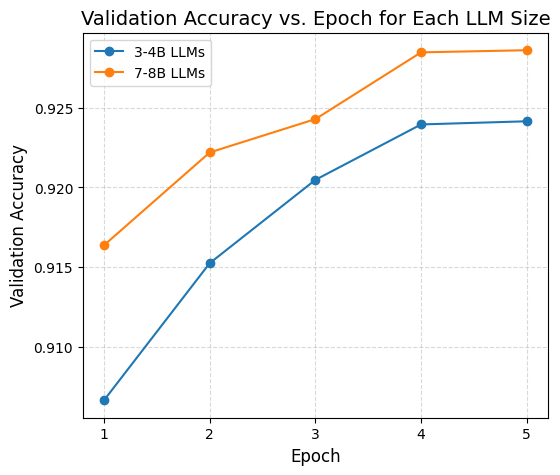

In [62]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12-14B LLMs", "70B+ LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

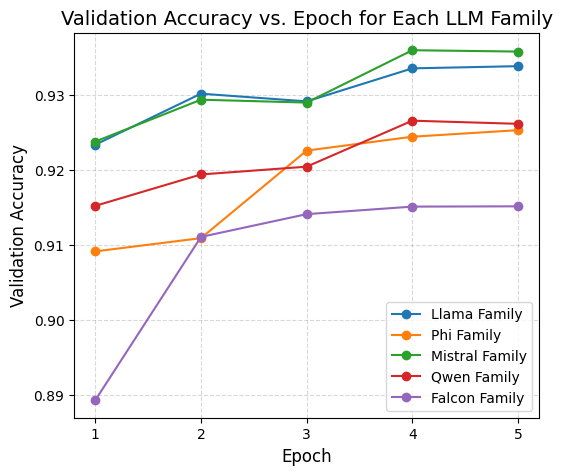

In [63]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()